<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practice" data-toc-modified-id="Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practice</a></span></li><li><span><a href="#Excercise" data-toc-modified-id="Excercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Excercise</a></span></li></ul></div>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Practice

In [37]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


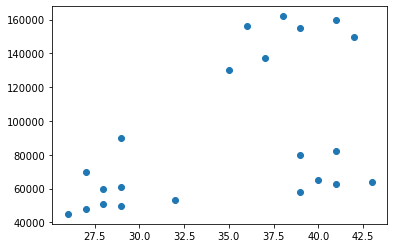

In [38]:
plt.scatter(df.Age, df['Income($)'])

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']].values)
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


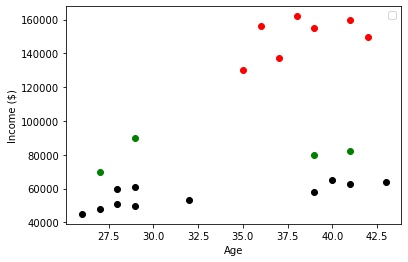

In [8]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age, df0['Income($)'],color='green')
plt.scatter(df1.Age, df1['Income($)'],color='red')
plt.scatter(df2.Age, df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']].values)
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [17]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [25]:
#centroids
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

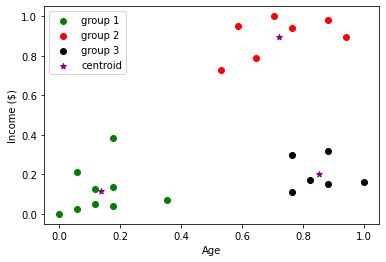

In [26]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age, df0['Income($)'],color='green', label = 'group 1')
plt.scatter(df1.Age, df1['Income($)'],color='red', label = 'group 2')
plt.scatter(df2.Age, df2['Income($)'],color='black', label = 'group 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [30]:
#elbow plot method
k_rng = range(1, 10)
sse = []
for k in k_rng(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.286071710668944,
 0.22476961228772663,
 0.16858512236029757,
 0.13265419827245162,
 0.10188787724979426]

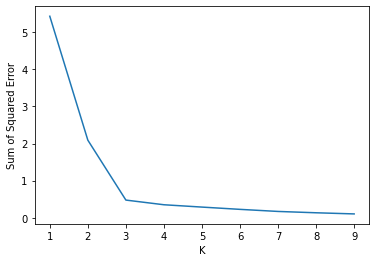

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

### Excercise

1. Use iris flower dataset from sklearn library to try to form clusters or flowers using petal width and length features.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k


In [34]:
from sklearn.datasets import load_iris
iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
df_iris = df_iris.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
df_iris

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


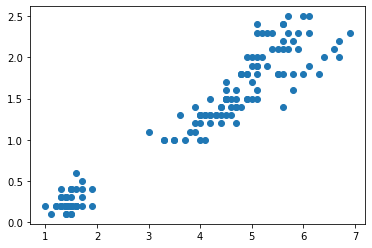

In [39]:
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)']);

In [41]:
km_iris = KMeans(n_clusters = 2)
km_iris.fit(df_iris[['petal length (cm)', 'petal width (cm)']])
y_predicted = km_iris.fit_predict(df_iris[['petal length (cm)', 'petal width (cm)']].values)
df_iris['cluster'] = y_predicted
df_iris.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


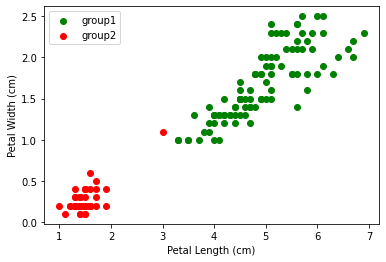

In [43]:
df0 = df_iris[df_iris.cluster==0]
df1 = df_iris[df_iris.cluster==1]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green', label='group1')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='red', label='group2')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

In [44]:
scaler_iris = MinMaxScaler()
scaler_iris.fit(df_iris[['petal width (cm)']])
df_iris['petal width (cm)'] = scaler_iris.transform(df_iris[['petal width (cm)']])

scaler_iris.fit(df_iris[['petal length (cm)']])
df_iris['petal length (cm)'] = scaler_iris.transform(df_iris[['petal length (cm)']])
df_iris

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [45]:
km_iris = KMeans(n_clusters = 2)
km_iris.fit(df_iris[['petal length (cm)', 'petal width (cm)']])
y_predicted = km_iris.fit_predict(df_iris[['petal length (cm)', 'petal width (cm)']].values)
df_iris['cluster'] = y_predicted
df_iris.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [46]:
km_iris.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

In [58]:
km_iris.cluster_centers_[:,0]

array([0.07245763, 0.62508475, 0.95932203, 0.52033898, 0.78220339,
       0.67266949, 0.10169492, 0.4039548 , 0.81779661])

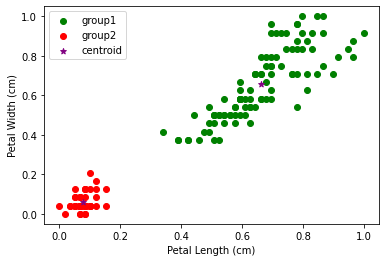

In [48]:
df0 = df_iris[df_iris.cluster==0]
df1 = df_iris[df_iris.cluster==1]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green', label='group1')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='red', label='group2')
plt.scatter(km_iris.cluster_centers_[:,0], km_iris.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend();

In [51]:
#elbow plot method
k_rng_iris = range(1, 10)
sse_iris = []
for k in k_rng_iris:
    km_iris = KMeans(n_clusters=k)
    km_iris.fit(df_iris[['petal length (cm)', 'petal width (cm)']])
    sse_iris.append(km_iris.inertia_)

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


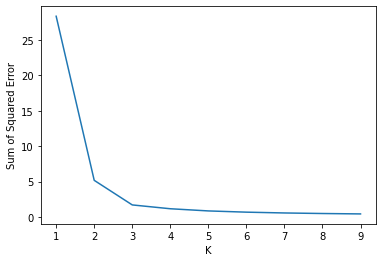

In [53]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng_iris, sse_iris)